# Исследование о продажах компьютерных игр

В нашем распоряжении исторические данные из открытых источников до 2016 г.: данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Цель исследования:**

1. Определить самые популярные компьютерные игры.
2. Построить автоматизированную систему, которая сможет выявить потенциально популярные игры и спланировать рекламны компании.
3. Выявить факторы, которые влияют на успешность компьютерной игры.

**Ход исследования**

Данные о компьютерных играх я получу из файла '/datasets/games.csv'. Данных за 2016 год могут быть неполными. О качество данных ничего неизвестно. Поэтому перед тем, как приступать к целям исследования, понадобится обзор данных.

Я проверю данные на ошибки и оценю их влияние на исследование. Затем на этапе предобработки я поищу возможность исправить все ошибки данных, которые не приведут к искажению конечного результата. Далее создам необходимые столбцы и приступлю к проведению исследовательского анализа.

Таким образом, моё исследование пройдёт в 10 этапов:
1. [Обзор данных.](#section_1)
2. [Предобработка данных.](#section_2)
3. [Расчеты и добавление результатов в таблицу.](#section_3)
4. [Исследовательский анализ данных.](#section_4)
5. [Проведение анализа для топ-3 игровых платформ.](#section_5)
6. [Проведение анализа пользовательской оценки и оценки критиков для самой популярной платформы.](#section_6)
7. [Портрет пользователя Северной Америки, Европы и Японии.](#section_7)
8. [Факторы, влияющие на успешность игры.](#section_8)
9. [Проверка гипотез.](#section_9)
10. [Написание общего вывода.](#section_10)

### Общая информация об исходных данных
<a id='section_1'></a>

Импортируем библиотеки для дальнейшей работы с ними.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
from scipy import stats as st

#### Импорт данных из csv-файла в датафрейм и сохранение в переменной `data`.

In [2]:
try:
    data = pd.read_csv('/datasets/games.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv', sep='\t')

#### Ознакомление с данными. Вывод первых 20 строк.

In [3]:
data.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


#### Описание данных.

*Name* - название игры,\
*Platform* - игровая платформа,\
*Year_of_Release* - год выпуска игры,\
*Genre* - жанр игры,            \
*NA_sales* - количество продаж в Северной Америке, миллионы проданных копий, \
*EU_sales* - количество продаж в Европе, миллионы проданных копий,         \
*JP_sales* - количество продаж в Японии, миллионы проданных копий,         \
*Other_sales* - количество других продаж, миллионы проданных копий,     \
*Critic_Score* - оценка критиков (максимум 100),\
*User_Score* - оценка пользователей (максимум 100),\
*Rating* - возрастной рейтинг компьютерной игры. Используется только в США, Канаде и Мексике. Актуальные рейтинги:
> EC - «early childhood» — для детей младшего возраста, \
> E - «еveryone» — для всех,\
> E10+ - «еveryone 10 and older» — для всех от 10 лет и старше,\
> T - «teen» — подросткам,\
> M - «mature» — для взрослых,\
> AO - «аdults Only 18+» — только для взрослых.

#### Вывод основной информации о датафрейме.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


#### Общая гистограмма для всех числовых столбцов таблицы

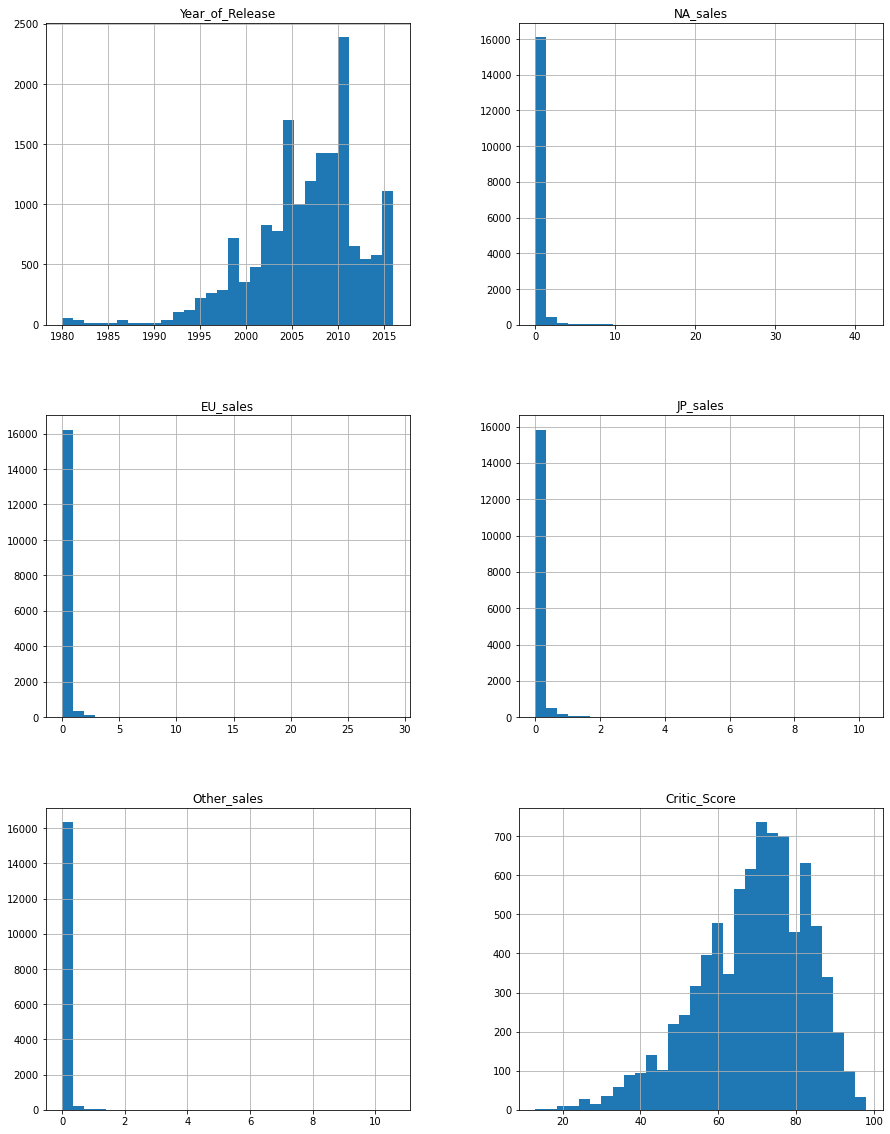

In [5]:
data.hist(figsize=(15, 20), bins=30);

### Предобработка данных
<a id='section_2'></a>

#### Изучение дубликатов.

Проверим датафрейм на наличие явных дубликатов.

In [6]:
data.duplicated().sum()

0

В датафрейме явных дубликатов нет. Плюс в копилочку однородности данных.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


#### Переименование столбцов.

Приведём названия столбцов к нижнему регистру.

In [8]:
#data = data.rename(columns= {'Name': 'name',\
                     #'Platform': 'platform',\
                     #'Year_of_Release': 'year_of_release',\
                     #'Genre': 'genre',\
                     #'NA_sales': 'na_sales',\
                     #'EU_sales': 'eu_sales',\
                     #'JP_sales': 'jp_sales',\
                     #'Other_sales': 'other_sales',\
                     #'Critic_Score': 'critic_score',\
                     #'User_Score': 'user_score',\
                     #'Rating': 'rating'})
                        
data.columns = data.columns.str.lower()

#### Поиск пропущенных значений и анализ причин пропусков данных. Изменение типов данных

In [9]:
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
name,0.000000
platform,0.000000
year_of_release,2.000000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.000000
user_score,40.000000


Есть пропуски в следующих столбцах:
+ year_of_release,
+ critic_score,
+ user_score, 
+ rating.

Рассмотрим внимательнее эти столбцы.

In [10]:
data.loc[data['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Пропуски в данных о годе выпуска игры появились, вероятнее всего, после технического сбоя, т.к. датафрейм хранит данные об уже выпущенных играх. 

Часть игр в своих названиях имеют число, похожее на год выпуска - можно ли заменить пропуск в данных года выпуска этим числом?
Такая замена будет некорректной, т.к. не всегда в названии игры отражен именно год выпуска. 

Например, в строке №183 указано название игры "Madden NFL 2004". На первый взгляд кажется, что это игра 2004 года, но в действительности год выпуска игры - 2003. Более того, игра была названа "Лучшей спортивной игрой 2003 года".

Так что же делать с пропусками в этом столбце? Пропуски есть в 2% данных - строки с этими пропусками можно спокойно удалить из датафрейма, т.к. процент пропусков незначительный и датафрейм не пострадает.

In [11]:
data.dropna(subset=['year_of_release'], inplace = True)

Изменим тип данных столбца *year_of_release*.

In [12]:
data['year_of_release'].astype('int')

0        2006
1        1985
2        2008
3        2009
4        1996
         ... 
16710    2016
16711    2006
16712    2016
16713    2003
16714    2016
Name: year_of_release, Length: 16446, dtype: int64

Посмотрим столбец *critic_score*. 

In [13]:
data['critic_score'].isna().sum()

8463

Доля пропусков в столбце с оценкой критиков - 51%. Заменить пропуски нулями, средними или медианными значениями в дальнейшем приведёт к некорректным результатам анализа. Удалить пропуски тоже нельзя - доля пропусков слишком высока. 

Приведём столбец к единому виду:
поменяем все пропуски на значение "200" - можно будет легко отличить игры без оценки, т.к. оценка критиков измеряется по 100-бальной шкале.

In [14]:
data['critic_score'] = data['critic_score'].fillna(200)

Посмотрим столбец *user_score*.

In [15]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Можно заметить значения **tbd** - "to be determined". Значит, столбец содержит не только дробные числа, но ещё и строковые значения. 

In [16]:
data.loc[data['user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,200.0,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,200.0,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
718,Just Dance Kids,Wii,2010.0,Misc,1.52,0.54,0.0,0.18,200.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,200.0,tbd,E


Для того, чтобы привести столбец к исключительно числовым значениям, избавимся от буквенных значений и заменим 'tbd' на 300. Продолжаем список кодовых значений 300 - игры, с рейтингом которых ещё не определились.

In [17]:
data.loc[data['user_score'] == 'tbd','user_score'] = 300

In [18]:
data.loc[data['user_score'].isna(),'user_score'] = 200

Изменяем тип данных стобце *user_score*.

In [19]:
data['user_score'] = data['user_score'].astype('float')

Посмотрим столбец *rating*.

In [20]:
data.loc[data['rating'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,200.0,200.0,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,200.0,200.0,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,200.0,200.0,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,200.0,200.0,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,200.0,200.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,200.0,200.0,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,200.0,200.0,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,200.0,200.0,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,200.0,200.0,NaN


Заменяем пустые значения на 'unknown'.

In [21]:
data['rating'] = data['rating'].fillna('unknown')

> EC - «early childhood» — для детей младшего возраста, \
> E - «еveryone» — для всех,\
> E10+ - «еveryone 10 and older» — для всех от 10 лет и старше,\
> T - «teen» — подросткам,\
> M - «mature» — для взрослых,\
> AO - «аdults Only 18+» — только для взрослых.

Посмотрим, какие рейтинг есть в датафрейме.

In [22]:
data['rating'].unique()

array(['E', 'unknown', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

Рейтинг RP - Rating Pending - игра ожидает присвоения статуса. Используется только на рекламных презентациях и в демо-версиях игр до официальной даты выпуска в продажу, т.к. до этого момента оценить игру невозможно.

Рейтинг K-A - это тоже самое, что и рейтинг Е, но до 1998 г. Заменим рейтинг К-А на рейтинг Е.

In [23]:
data.loc[data['rating'] == 'K-A','rating'] = 'E'

Посмотрим датафрейм снова.

In [24]:
data.tail(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.00,0.0,67.0,300.0,E
16696,Breach,PC,2011.0,Shooter,0.01,0.00,0.00,0.0,61.0,5.8,T
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.00,0.0,53.0,300.0,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.00,0.0,48.0,300.0,E
16699,The Longest 5 Minutes,PSV,2016.0,Action,0.00,0.00,0.01,0.0,200.0,200.0,unknown
16700,Mezase!! Tsuri Master DS,DS,2009.0,Sports,0.00,0.00,0.01,0.0,200.0,200.0,unknown
16701,Eiyuu Densetsu: Sora no Kiseki Material Collec...,PSP,2007.0,Role-Playing,0.00,0.00,0.01,0.0,200.0,200.0,unknown
16702,STORM: Frontline Nation,PC,2011.0,Strategy,0.00,0.01,0.00,0.0,60.0,7.2,E10+
16703,Strawberry Nauts,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,200.0,200.0,unknown
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.00,0.0,200.0,300.0,E


Что стало причиной возникновения пропусков в стоблцах с оценкой? Вероятнее всего, произошел технологический сбой, т.к. доля пропусков высока и есть пропуски в данных с оценкой игр 10-летней давности.

С пропусками в столбце с рейтингом другая история - рейтинг ESRB используется только в США, Канаде и Мексике. Т.е. игры других стран, например, Японии, которая входит в топ-5 по разработке игр, будут без рейтинга. Отсюда большое количество пропусков.

#### Добавление столбца *sales_sum* со значением суммарных продаж по всем регионам. <a id='section_3'></a>

In [25]:
data['sales_sum'] = data['na_sales'] + data['jp_sales'] + data['eu_sales'] + data['other_sales']

In [26]:
# Посмотрим датафрейм

data.head(15). sort_values(by='sales_sum', ascending=False)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_sum
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,200.0,200.0,unknown,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,200.0,200.0,unknown,31.38
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,200.0,200.0,unknown,30.26
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,200.0,200.0,unknown,28.31


Игра Wii Sports	кажется выбросом. Слишком высокие продажи в Северной Америке. Даже выше чем у Марио. Избавимся от этой сроки, чтобы анализ не искажался.

In [27]:
data = data[data['name'] != 'Wii Sports']

### Исследовательский анализ данных.
<a id='section_4'></a>

#### Количество выпущенных игр в зависимости от года

Text(0.5, 1.0, 'Зависимость количества игр от года')

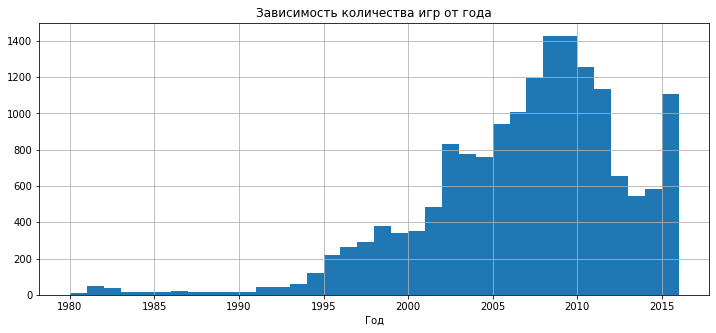

In [28]:
data['year_of_release'].hist(bins=36, figsize=(12,5))

plt.xlabel('Год')
plt.title('Зависимость количества игр от года')

+ 2009 и 2010 - самые богатые года на новые игр - чуть больше 1400 игр в год. 
+ А до 1991 ожидаемо продавалось мало игр.
+ C 2013 по 2015 наблюдается ярковыраженный спад в выпуске игр. Интересно, с чем это связано?

Для дальнейшего исследования будем рассматривать только актуальный период - с 2012 по 2016 года. Использование в исследовании данных за предыдущие года некорректно, т.к. по этим данным мы будем делать прогноз на 2017 год.

In [29]:
data = data[data['year_of_release']>=2012]

#### Количество продаж  для каждой из платформ

Посмотрим, на какую платформу больше всего продаж?

In [30]:
data.groupby('platform')['sales_sum'].count().sort_values(ascending=False)

platform
PS3     493
PSV     411
3DS     396
PS4     392
X360    292
PC      250
XOne    247
PSP     173
WiiU    147
Wii      54
DS       31
Name: sales_sum, dtype: int64

+ Ожидаемо, что самое большое количество игр выпускалось на Play Station - консоли PS3 (топ-1), PSV (топ-2) и PS4 (топ-4).
+ Nintendo 3DS входит в топ-3. 
+ Xbox360 тоже пользуется популярностью (топ-5). 
+ Персональный компьютер не входит в топ-5 (6 место). Похоже, издатели игр расставили приоритеты не в пользу компьютеров. Посмотрим, оправдалось ли такое решение.

In [31]:
data.groupby('platform')['sales_sum'].sum()\
    .sort_values(ascending=False)

platform
PS4     314.14
PS3     288.79
X360    236.54
3DS     194.61
XOne    159.32
WiiU     82.19
PC       62.65
PSV      49.18
Wii      35.37
DS       12.55
PSP      11.19
Name: sales_sum, dtype: float64

+ Самая прибыльная платформа - PS4 (314.14 млн проданных копий).
+ Для PS3 продали немного меньше игр - 288.79 млн проданных копий (топ-2).
+ С отрывом в 52 млн проданных копий идёт Xbox360 (топ-3).
+ Для 3DS продали 194.61 млн копий (топ-4).
+ Продажи на Xbox One составляют 159.32 млн проданных копий (топ-5).
+ Для компьютеров продано 62.65 млн копий игр (7 место). Гипотеза о пересмотрении приоритетов платформ при создании игр вполне правдоподобна. Пользователи компьютеров и правда покупают игры реже, чем пользователи консолей.

#### Топ-3 игровых платформ
<a id='section_5'></a>

In [32]:
#data.nlargest(20, 'sales_sum')\
#data[data['platform'] in ['PS2', 'X360', 'PS']]
top_3_platform = data.query("platform in ['PS4','PS3','X360']")
top_3_platform.groupby(['platform', 'year_of_release']).agg({'sales_sum':'sum', 'year_of_release':'count'})

sales_sum  year_of_release
platform year_of_release                            
PS3      2012.0              107.36              148
         2013.0              113.25              126
         2014.0               47.76              108
         2015.0               16.82               73
         2016.0                3.60               38
PS4      2013.0               25.99               16
         2014.0              100.00               75
         2015.0              118.90              137
         2016.0               69.25              164
X360     2012.0               99.74              106
         2013.0               88.58               75
         2014.0               34.74               63
         2015.0               11.96               35
         2016.0                1.52               13

+ PS3 в 2013 году достигла пика популярности. Наш датафрейм ограничивается 2016 годом, но этого достаточно, чтобы сказать, что за 3 года игры на эту платформу стали редкими.
+ PS4 за 2 года достигла пика популярности по продажам в 2015 году. В 2016 году продажи пошли на спад.
+ X360 достигла своего расцвета в 2011-2012 году. Спустя 4 года игры на эту платформу стали редкими.

Text(0, 0.5, 'Объем продаж, млн.копий')

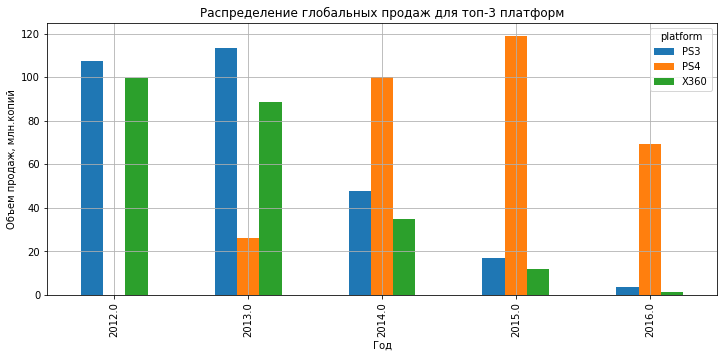

In [33]:
top_3_platform.pivot_table(index='year_of_release',\
                                            columns='platform',\
                                            values='sales_sum',\
                                            aggfunc='sum').plot(grid=True, kind='bar', figsize=(12,5))
plt.title('Распределение глобальных продаж для топ-3 платформ')
plt.xlabel('Год')
plt.ylabel('Объем продаж, млн.копий')
#plt.ylim(0,20)

+ По объёму продаж самую большую популярность PS3 имела в 2013 году,  PS4 - в 2015 году, X360 - в 2012 году.
+ Интересный факт: для платформ PS3 и PS4 год с максмальным количество игр, выпущенных на эту платформу, и год с пиком глобальных продаж, отличаются.

> Платформы набирают популярность по продажам примерно 2 года.
> Примерно спустя 3 года продажи на платформу начинают стремиться к 0. 

(0.0, 8.0)

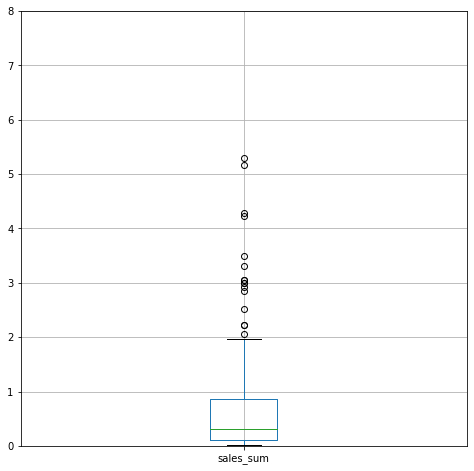

In [34]:
#top_3_platform = data.query("platform in ['PS2','X360','PS3']")
#top_3_platform.boxplot(grid=True, column='sales_sum', figsize=(8,8))
data[data['platform'] == 'X360'].boxplot(grid=True, column='sales_sum', figsize=(8,8))

plt.ylim(0, 8)

Уточним описание.

In [35]:
data[data['platform'] == 'X360']['sales_sum'].describe()

count    292.000000
mean       0.810068
std        1.712069
min        0.010000
25%        0.100000
50%        0.310000
75%        0.870000
max       16.270000
Name: sales_sum, dtype: float64

+ Медианное количество продаж игр для X360 - 280 тысяч копий.
+ Если судить по диаграмме размаха, количество продаж примерно до 3.5 млн копий происходит достаточно часто.
+ Продажи cвыше 3.5 млн копий - единичные случаи, не смотря на то, что есть игра, достигшая 21.82 млн продаж.

(0.0, 7.0)

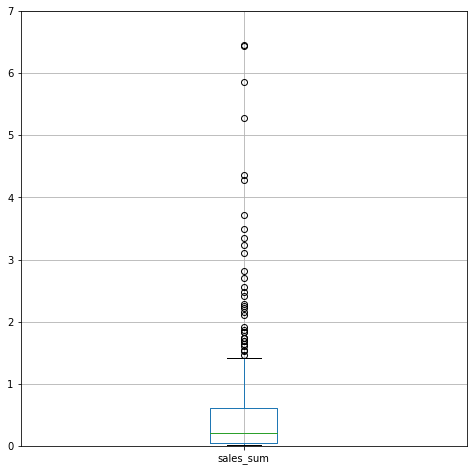

In [36]:
data[data['platform'] == 'PS3'].boxplot(grid=True, column='sales_sum', figsize=(8,8))

plt.ylim(0, 7)

In [37]:
data[data['platform'] == 'PS3']['sales_sum'].describe()

count    493.000000
mean       0.585781
std        1.462855
min        0.010000
25%        0.050000
50%        0.200000
75%        0.610000
max       21.050000
Name: sales_sum, dtype: float64

+ Медианное количество продаж игр для PS3 - 280 тысяч копий.
+ Если судить по диаграмме размаха, количество продаж примерно до 3 млн копий происходит достаточно часто.
+ Продажи cвыше 3 млн копий - единичные случаи, не смотря на то, что есть игра, достигшая 21.05 млн продаж.

(0.0, 5.0)

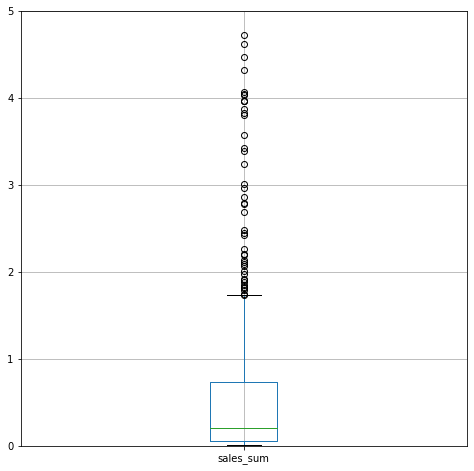

In [38]:
data[data['platform'] == 'PS4'].boxplot(grid=True, column='sales_sum', figsize=(8,8))

plt.ylim(0, 5)

In [39]:
data[data['platform'] == 'PS4']['sales_sum'].describe()

count    392.000000
mean       0.801378
std        1.609456
min        0.010000
25%        0.060000
50%        0.200000
75%        0.730000
max       14.630000
Name: sales_sum, dtype: float64

+ Медианное количество продаж игр для PS4 - 200 тысяч копий.
+ Если судить по диаграмме размаха, количество продаж примерно до 2.2 млн копий происходит достаточно часто.
+ Продажи cвыше 2.2 млн копий - единичные случаи, не смотря на то, что есть игра, достигшая 14.63 млн продаж.

#### Зависимость количества продаж от оценки критиков и пользователей
<a id='section_6'></a>

Для исследования возьмём самую прибыльную платформу - PS4. 

In [40]:
data_score_ps4 = data[data['platform'] == 'PS4']

##### Зависимость количества продаж от оценки критиков

Text(0.5, 1.0, 'Зависимость глобальных продаж от оценки критиков')

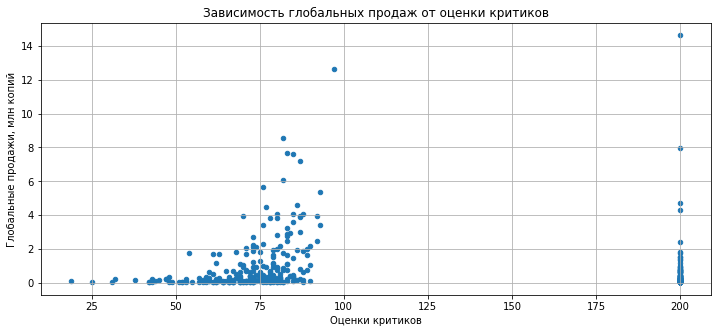

In [41]:
data_score_ps4.pivot_table(index='critic_score', values='sales_sum')

data_score_ps4.plot(x='critic_score', y='sales_sum', grid=True,  figsize=(12,5), kind='scatter')
    
plt.xlabel('Оценки критиков')
plt.ylabel('Глобальные продажи, млн копий')
plt.title('Зависимость глобальных продаж от оценки критиков')

Не забываем, что в столбце с оценкой критиков хранятся не только оценки, но и кодовые значения 200 - отсутствие оценки. Таких игр много. Посмотрим данные в разреза от игр без оценки критиков.

(0.0, 9.0)

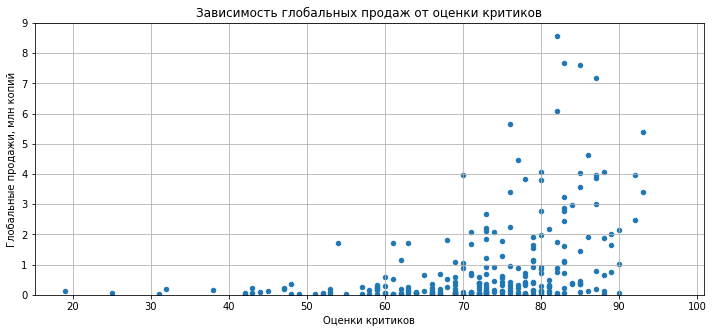

In [42]:
data_critic_score = data_score_ps4.query("critic_score != 200")
data_critic_score.pivot_table(index='critic_score', values='sales_sum')

data_critic_score.plot(x='critic_score', y='sales_sum', grid=True,  figsize=(12,5), kind='scatter')
    
plt.xlabel('Оценки критиков')
plt.ylabel('Глобальные продажи, млн копий')
plt.title('Зависимость глобальных продаж от оценки критиков')
plt.ylim(0, 9)

По диаграмме рассеивания можно увидеть тенденцию к увеличению оценки критиков при росте глобальных продаж. Но есть значения, не попадающие под влияние тенденции.

Рассчитаем коэффициент корреляции Пирсона - чем ближе коэффициент корреляции Пирсона к крайним значениям 1 или -1, тем очивидее линейная взаимосвязь. Если значение близко к нулю, значит, линейная связь слабая либо отсутствует вовсе. 

In [43]:
data_critic_score['critic_score'].corr(data_critic_score['sales_sum'])

0.40656790206178095

Коэффициент корреляции Пирсона равен 0.41. Зависимость между глобальными продажами и оценкой пользователей прослеживается. Значит линейная связь между успешностью игры и оценкой пользователей подтверждается.

##### Зависимость количества продаж от оценки пользователей

Уберём сразу данные с *tbd* и пропуски.

(0.0, 9.0)

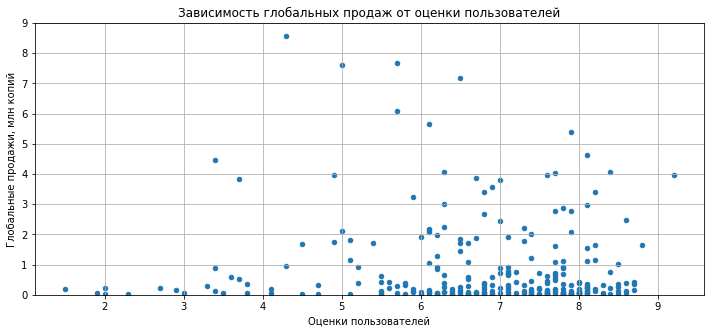

In [44]:
data_user_score = data_score_ps4.query("user_score <= 100")
data_user_score.pivot_table(index='user_score', values='sales_sum')

data_user_score.plot(x='user_score', y='sales_sum', grid=True,  figsize=(12,5), kind='scatter')
    
plt.xlabel('Оценки пользователей')
plt.ylabel('Глобальные продажи, млн копий')
plt.title('Зависимость глобальных продаж от оценки пользователей')
plt.ylim(0, 9)

По диаграмме рассеивания оценки пользователей сложно сделать выводы о наличии связи. Но значения более хаотичнее, чем оценка критиков.

Рассчитаем коэффициент корреляции Пирсона - чем ближе коэффициент корреляции Пирсона к крайним значениям 1 или -1, тем очивидее линейная взаимосвязь. Если значение близко к нулю, значит, линейная связь слабая либо отсутствует вовсе. 

In [45]:
data_user_score['user_score'].corr(data_user_score['sales_sum'])

-0.03195711020455639

Значит линейная связь между глобальными продажами и оценкой пользователей отсутствует. Гипотеза о наличии зависимости между успешностью игры и оценкой пользователей не подтверждается. 

> Оказывается, оценка критиков точнее оценки пользователей.

Оценка выборки датафрейма тождественна оценке генеральной совокупности. Будем придерживаться данных выводов не только для PS4, но и для всех игр.

#### Зависимость успешности игры от жанра
<a id='section_8'></a>

(0.0, 15.0)

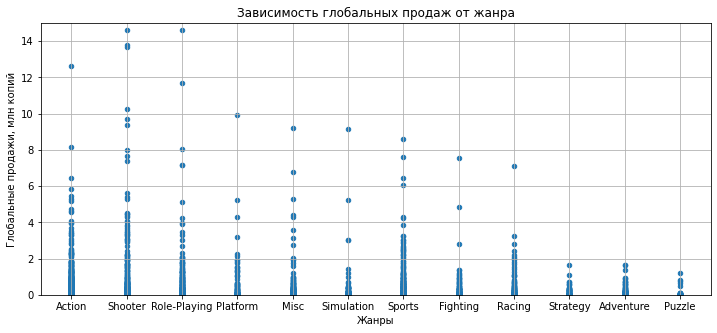

In [46]:
data.pivot_table(index='genre', values='sales_sum')

data.plot(x='genre', y='sales_sum', grid=True,  figsize=(12,5), kind='scatter')
    
plt.xlabel('Жанры')
plt.ylabel('Глобальные продажи, млн копий')
plt.title('Зависимость глобальных продаж от жанра')
plt.ylim(0, 15)

+ На графике явно видно, что у шутеров глобальные продажи выше.
+ Среди Role-Playing и Action тоже есть игры с высокими глобальными продажами, но у шутеров такие игры встречаются чаще. 
+ Самые низкие продажи у игр-пазлов, приключенческих игр и стратегий.

In [47]:
data.groupby(by='genre')['sales_sum'].median()\
    .sort_values(ascending=False)

genre
Shooter         0.440
Sports          0.240
Platform        0.210
Role-Playing    0.140
Racing          0.140
Fighting        0.130
Action          0.120
Misc            0.120
Simulation      0.120
Strategy        0.080
Puzzle          0.045
Adventure       0.030
Name: sales_sum, dtype: float64

Судя по медианным значениям количества продаж игр, самый успешный жанр - шутеры. Второе и третье место разделили спортивные игры и платформеры. А Role-Playing и Action разделили 4 и 7 места по количеству продаж соотвественно.

Игры-пазлы, приключенческие игры и стратегии, как и ожидалось, имеют самые низкие продажи.

Text(0.5, 1.0, 'Количество выпускаемых игр в каждом жанре')

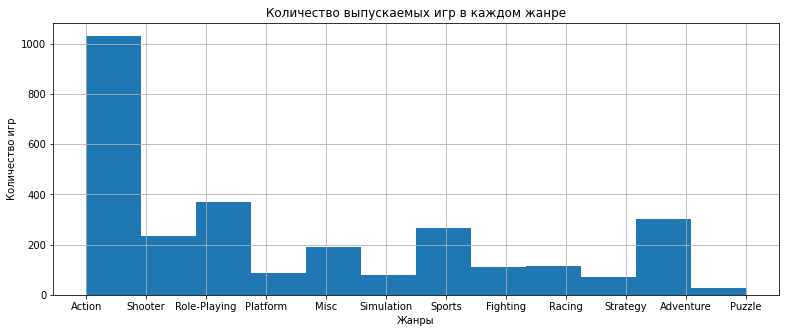

In [48]:
data['genre'].hist(bins=12, figsize=(13,5))

plt.xlabel('Жанры')
plt.ylabel('Количество игр')
plt.title('Количество выпускаемых игр в каждом жанре')

+ Чаще всего выпускают игры жанра экшн.
+ Не смотря на то, что шутеры самые продаваемые, их выпускают меньше спортивных игр, прилюченческих игр и RPG (Role-Playing).
+ Самые редко выпускаемые игры в порядке возрастания: игры-пазлы, стратегии, файтинги и гонки.
+ Не смотря на то, что приключенческих игр выпускают много, успешностью они особо не пользуются (самые низкие глобальные продажи среди всех жанров).

### Портрет пользователя каждого региона
<a id='section_7'></a>

#### Северная Америка

##### Самые популярные платформы

In [49]:
top_5_na = data.query('na_sales != 0').groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)
top_5_na = pd.DataFrame(top_5_na)
sales_sum_na = sum(data['na_sales'])
top_5_na['percent_of_global'] = top_5_na['na_sales']/sales_sum_na*100

top_5_na

,na_sales,percent_of_global
platform,,
X360,140.05,23.698326
PS4,108.74,18.400257
PS3,103.38,17.493274
XOne,93.12,15.757145
3DS,55.31,9.359189


+ Удивительно, но Xbox360 популярнее в Северной Америке.
+ A 3DS менее популярна.

##### Рейтинг ESRB

In [50]:
rating_na = data.query('na_sales != 0').groupby('rating')['na_sales'].sum().sort_values(ascending=False)
rating_na

rating
M          231.57
E          114.37
unknown    103.31
E10+        75.70
T           66.02
Name: na_sales, dtype: float64

Лидирует рейтинг М (для взрослых).

##### Самые популярные жанры

In [51]:
top_5_na_genre = data.query('na_sales != 0').groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)
top_5_na_genre = pd.DataFrame(top_5_na_genre)
sales_sum_na = sum(data['na_sales'])
top_5_na_genre['percent_of_global'] = top_5_na_genre['na_sales']/sales_sum_na*100

top_5_na_genre

,na_sales,percent_of_global
genre,,
Action,177.84,30.092898
Shooter,144.77,24.497013
Sports,81.53,13.795963
Role-Playing,64.00,10.829653
Misc,38.19,6.462257


+ В Северной Америке самый популярный жанр - экшн.
+ Шутеры разместились на 2 месте по популярности.
+ Платформеры вышли из топ-5: его место заняли игры жанра Misc
.

#### Европа

##### Самые популярные платформы

In [52]:
top_5_eu = data.query('eu_sales != 0').groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)
top_5_eu = pd.DataFrame(top_5_eu)
sales_sum_eu = sum(data['eu_sales'])
top_5_eu['percent_of_global'] = top_5_eu['eu_sales']/sales_sum_eu*100

top_5_eu

,eu_sales,percent_of_global
platform,,
PS4,141.09,27.838286
PS3,106.86,21.084409
X360,74.52,14.703445
XOne,51.59,10.179156
3DS,42.64,8.413243


+ Xbox One в Европе популярнее, чем в мире (4 место по популярности, а не 5). 

##### Рейтинг ESRB

In [53]:
rating_eu = data.query('eu_sales != 0').groupby('rating')['eu_sales'].sum().sort_values(ascending=False)
rating_eu

rating
M          193.96
E          113.03
unknown     91.50
E10+        55.37
T           52.96
Name: eu_sales, dtype: float64

Картина cхожая с рейтингом ESRB Северной Америки.

##### Самые популярные жанры

In [54]:
top_5_eu_genre = data.query('eu_sales != 0').groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)
top_5_eu_genre = pd.DataFrame(top_5_eu_genre)
sales_sum_eu = sum(data['eu_sales'])
top_5_eu_genre['percent_of_global'] = top_5_eu_genre['eu_sales']/sales_sum_eu*100

top_5_eu_genre

,eu_sales,percent_of_global
genre,,
Action,159.34,31.439170
Shooter,113.47,22.388619
Sports,69.09,13.632059
Role-Playing,48.53,9.575392
Racing,27.29,5.384555


+ В топ-5 платформ по популярности вошли гонки.
+ Самый популярный жанр - экшн.
+ В платформеры в Европе играют меньше.

#### Япония

##### Самые популярные платформы

In [55]:
top_5_jp = data.query('jp_sales != 0').groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)
top_5_jp = pd.DataFrame(top_5_jp)
sales_sum_jp = sum(data['jp_sales'])
top_5_jp['percent_of_global'] = top_5_jp['jp_sales']/sales_sum_jp*100

top_5_jp

,jp_sales,percent_of_global
platform,,
3DS,87.79,45.586250
PS3,35.29,18.324852
PSV,21.04,10.925330
PS4,15.96,8.287465
WiiU,13.01,6.755634


+ В Японии рейтинг платформ по популярности значительно отличается от рейтинга глобальных продаж.
+ Самая популярная платформа - 3DS. Поддерживаем своего производителя.
+ На пятом месте по популярности - WiiU. В этом же рейтинге глобальных продаж WiiU на шестом месте.
+ Xbox360 не пользуется популярностью в Японии (9 место).
+ В целом в Японии пользуются популярности более старые платформы.


##### Рейтинг ESRB

In [56]:
rating_jp = data.query('jp_sales != 0').groupby('rating')['jp_sales'].sum().sort_values(ascending=False)
rating_jp

rating
unknown    108.84
E           28.33
T           26.02
M           21.20
E10+         8.19
Name: jp_sales, dtype: float64

+ Самые популярные игры - игры без рейтинга, японские игры. Если учесть, что японцы поддерживают свои платформы, то игры, скорее всего, тоже.
+ Игры рейтинга Е (для всех) и Т (для подростков) пользуются большей популярностью.

##### Самые популярные жанры

In [57]:
top_5_jp_genre = data.query('jp_sales != 0').groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)
top_5_jp_genre = pd.DataFrame(top_5_jp_genre)
sales_sum_jp = sum(data['jp_sales'])
top_5_jp_genre['percent_of_global'] = top_5_jp_genre['jp_sales']/sales_sum_jp*100

top_5_jp_genre

,jp_sales,percent_of_global
genre,,
Role-Playing,65.44,33.980683
Action,52.80,27.417177
Misc,12.86,6.677744
Simulation,10.41,5.405546
Fighting,9.44,4.901859


+ Самый популярный жанр игр в Японии - RPG (Role-Playing).
+ В топ-5 вошли экшн (2 место), Misc (3 место), симуляторы (4 место) и файтинги (5 место).
+ Шутеры в Японии лишь на 6-ом месте по популярности. Интересная, самобытная Япония!

### Проверка  гипотез.
<a id='section_9'></a>

#### Гипотеза 1 - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Нулевая гипотеза: средняя пользовательская оценка платформ Xbox One и PC одинаковая.

Альтернативная гипотеза: средняя пользовательская оценка платформ Xbox One и PC разная.

In [58]:
xbox_one = data[(data['platform'] == 'XOne')&(data['user_score'] <= 100)]['user_score']
PC = data[(data['platform'] == 'PC')&(data['user_score'] <= 100)]['user_score']

alpha = .05

results = st.ttest_ind(
    xbox_one,
    PC)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

p-значение: 0.5535080500643661
Не отвергаем нулевую гипотезу


Принимаем гипотезу - средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

#### Гипотеза 2 - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Нулевая гипотеза: средняя пользовательская оценка жанров Action и Sports одинаковая.

Альтернативная гипотеза: средняя пользовательская оценка жанров Action и Sports разные.

In [59]:
action = data[(data['genre'] == 'Action')&(data['user_score'] <= 100)]['user_score']
sports = data[(data['genre'] == 'Sports')&(data['user_score'] <= 100)]['user_score']

alpha = .05

results = st.ttest_ind(
    action,
    sports)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

p-значение: 3.7163089460934874e-26
Отвергаем нулевую гипотезу


Гипотезу отвергаем в пользу альтернативной гипотезы: средние пользовательские рейтинги жанров Action и Sports одинаковые.

### Общий вывод
<a id='section_10'></a>

Было проведено исследование с целью выявления влияния различных факторов на успешность игры. Входные данные - исторические данные из открытых источников до 2016 г.: данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. Результаты исследования будут полезны:
+ при прогнозировании продаж на 2017 год,
+ при оценке факторов, влияющих на успешность игр,
+ при проектировании автоматизированной оценки пользователей игр.

Перед проведением исследования были сформулированы следующие гипотезы:
- Гипотеза 1 - Пользовательская оценка влияет на успешность игры.
- Гипотеза 2 - Оценка критиков влият на успешность игры.
- Гипотеза 3 - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
- Гипотеза 4 - Средние пользовательские рейтинги жанров Action и Sports разные.

В результате удалось выявить определенные зависимости.

**Гипотеза 1 не подтверждена:** пользовательская оценка не влияет на успешность игры.

- Коэффициент корреляции Пирсона равен 0.03. Линейная связь между глобальными продажами и оценкой пользователей отсутствует. 

**Гипотеза 2 подтверждена:** оценка критиков действительно влият на успешность игры.

- Коэффициент корреляции Пирсона равен 0.41. Зависимость между глобальными продажами и оценкой пользователей прослеживается. 

**Гипотеза 3 подтверждена:** средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

**Гипотеза 4 не подтверждена:** средние пользовательские рейтинги жанров Action и Sports одинаковые.


**Общие наблюдения:**
1. Топ-5 платформ по количеству выпущенных на неё игр (начиная с топ-1): PS4, PS3, X360, 3DS, XOne. 


2. Платформы набирают популярность по продажам примерно 2 года.

Примерно спустя 3 года продажи на платформу начинают стремиться к 0. 


3. Топ-5 успешных жанров (начиная с топ-1): Shooter, Sports, Platform, Role-Playing, Racing.  


4. Портрет пользователя Северной Америки:

+ Топ-5 платформ (начиная с топ-1): X360, PS4, PS3, XOne, 3DS.

Xbox360 популярнее в Северной Америке.\
A 3DS менее популярна.

+ Рейтинг ESRB по популярности (от самого популярного): M, E, без рейтинга, E10+, T.

+ Топ-5 жанров (начиная с топ-1): Action, Shooter, Sports, Role-Playing, Misc.

Платформеры не попали в топ-5: его место заняли игры жанра Misc.


5. Портрет пользователя из Европы:

+ Топ-5 платформ (начиная с топ-1): X360, PS4, PS3, XOne, 3DS.

Xbox One в Европе популярнее, чем в мире (4 место по популярности, а не 5).\
Портреты пользователей из Европы и Северной Америки совпадают.

+ Рейтинг ESRB по популярности (от самого популярного): M, E, без рейтинга, E10+, T.

+ Топ-5 жанров (начиная с топ-1): Action, Shooter, Sports, Role-Playing, Racing. 

В топ-5 платформ по популярности вошли гонки.\
В платформеры в Европе играют меньше.


6. Портрет пользователя из Японии:

+ Топ-5 платформ (начиная с топ-1): DS, 3DS, PS2, PS3, PSP.

В Японии рейтинг платформ по популярности значительно отличается от рейтинга глобальных продаж.\
На пятом месте по популярности - WiiU. В этом же рейтинге глобальных продаж WiiU на шестом месте.\
Xbox360 не пользуется популярностью в Японии (9 место).\
В целом в Японии пользуются популярности более старые платформы.

+ Рейтинг ESRB по популярности (от самого популярного): без рейтинга, E, T, M, E10+.

Игры рейтинга Е (для всех) и Т (для подростков) пользуются большей популярностью.\
В Японии популярны японские игры.

+ Топ-5 жанров (начиная с топ-1): Role-Playing, Action, Misc, Simulation, Fighing.

Портрет пользователя из Японии сильно отличается от портрета пользователя из Европы или Северной Америки.

**Общие рекомендации:**
1. Специалистам по прогнозированию продаж воспользоваться гипотезами 2, 3 и альтернативной гипотезой 4.

Обзор данных выполнялся согласно следующим этапам:
1. Обзор данных.
2. Предобработка данных.
3. Расчеты и добавление результатов в таблицу.
4. Проведение анализа для топ-3 игровых платформ.
5. Проведение анализа пользовательской оценки и оценки критиков для самой популярной платформы.
6. Портрет пользователя Северной Америки, Европы и Японии.
7. Факторы, влияющие на успешность игры.
8. Проверка гипотез.
9. Написание общего вывода.